## Financial Data Analysis


### Portfolio optimization

##### IMPORTING IMPORTANT LIBRARIES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import sys
import os


sys.path.append(os.path.abspath("../scripts"))
from utils import *
from financial_analyzer import *

data_utils = DataUtils()
portfoliio_optimizer = PortOptimizer()

##### Loading adjucted close for all the tickers

In [3]:
ticker_prices = portfoliio_optimizer.load_adjusted_adj_close_all_ticker()
ticker_prices.head()

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-12-12,16.400513,12.5880,17.354130,27.523441,22.142914,0.288944,2.350667
2012-12-13,16.117235,12.5625,17.482006,28.182087,22.037241,0.289175,2.240667
2012-12-14,15.511719,12.4595,17.463594,26.755020,21.793373,0.290560,2.254000
2012-12-17,15.786786,12.6930,17.931807,26.695143,22.029112,0.289406,2.293333
2012-12-18,16.245329,13.0200,17.939020,27.653173,22.403040,0.289867,2.306000


In [4]:
# Calculates covariance matrix and expected return for efficient frontier
covariance_matrix, expected_return = portfoliio_optimizer.calculate_eReturn_covariance(ticker_prices)

In [5]:
# Efficient frontier for portfolio optimization
ef = portfoliio_optimizer.calculate_EfficientFrontier(ticker_prices)

In [6]:
# This is the ratio of weights you have to buy without considering
clean_weights = portfoliio_optimizer.clean_weights(ticker_prices)
clean_weights

OrderedDict([('AAPL', 0.0),
             ('AMZN', 0.0),
             ('GOOG', 0.0),
             ('META', 0.0),
             ('MSFT', 0.21465),
             ('NVDA', 0.65778),
             ('TSLA', 0.12757)])

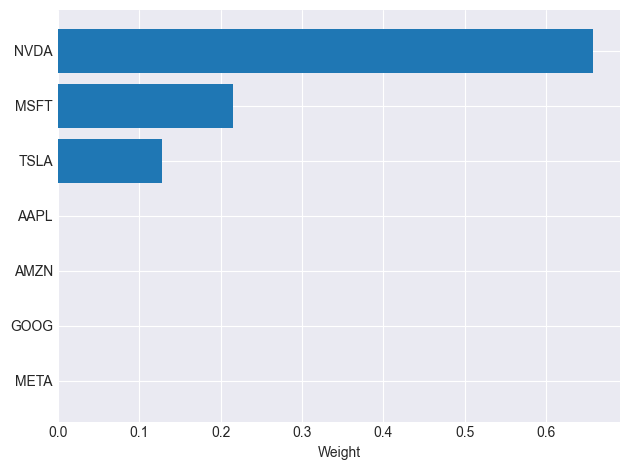

In [7]:
portfoliio_optimizer.plot_weights(ticker_prices, allow_shorts=False)

Expected annual return: 55.7%
Annual volatility: 36.7%
Sharpe Ratio: 1.47


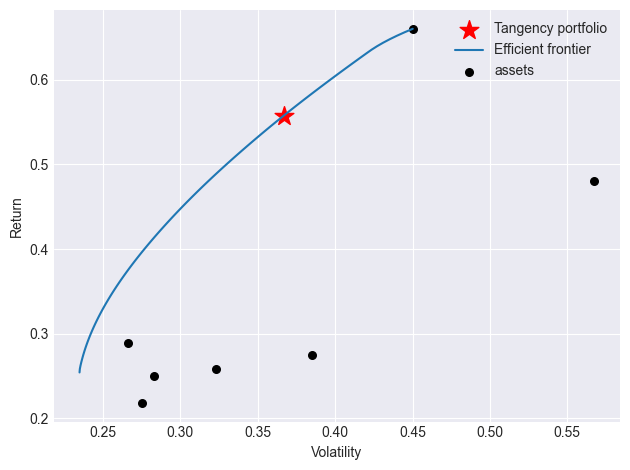

In [8]:
portfoliio_optimizer.plot_efficient_frontier(ticker_prices, allow_shorts=False)

**Observation**
- Holding only long postions with different weights of assets could result an expected annual return of 55.7%
- From the efficient frontier graph we can see how we can optimize our portfolio to maximize our returns. 

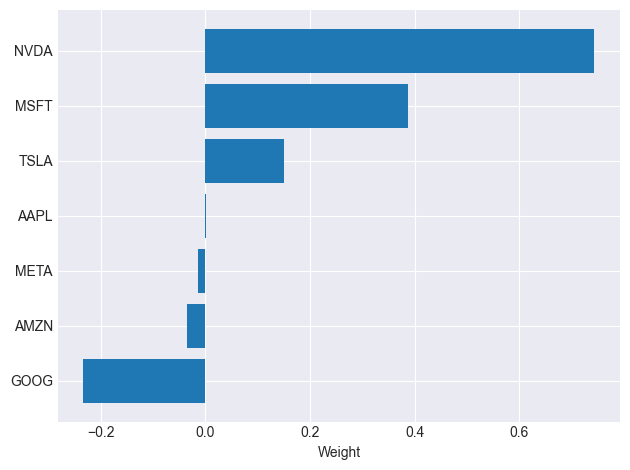

In [9]:
portfoliio_optimizer.plot_weights(ticker_prices, allow_shorts=True)

Expected annual return: 61.1%
Annual volatility: 40.0%
Sharpe Ratio: 1.48


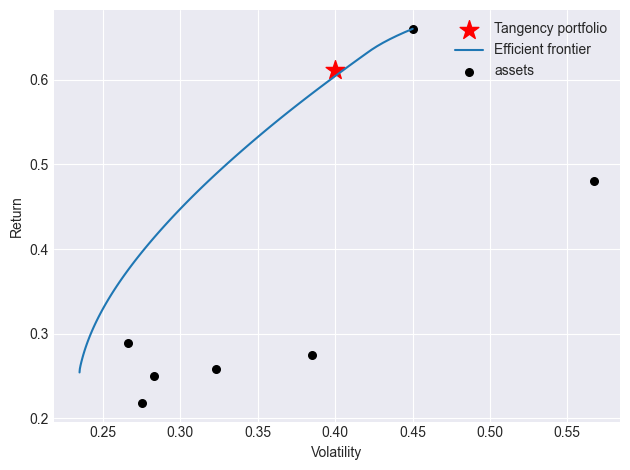

In [10]:
portfoliio_optimizer.plot_efficient_frontier(ticker_prices, allow_shorts=True)

**Observation** 
- From the analysis, we can observe that diversifying our portfolio significantly mitigates risk by reducing overall volatility. This is clearly illustrated by the efficient frontier graphs above, which show a more favorable risk-return trade-off as diversification increases.

- Additionally, the analysis reveals that incorporating short positions alongside long positions in our strategy can enhance potential profits. By strategically holding short positions, we can capitalize on market downturns, further optimizing our portfolio’s performance beyond what would be achieved by only buying stocks.  In the above case, our portfolio's expected return increased by almost 6% by holding shorts.